# <p style = "font-size : 50px; color : #ffffff ; font-family : 'Comic Sans MS'; text-align : center; background-color : #000000; border-radius: 11px 11px; padding: 5px 5px">Spam Detection System</p>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Collection

### Loading the Spam Dataset

In [10]:
spam_df = pd.read_csv('data/spam.csv',encoding='ISO-8859-1')

### Statistical Analysis

In [11]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
spam_df.shape

(5572, 5)

In [13]:
spam_df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [14]:
spam_df.duplicated().sum()

403

# 2. Data Cleaning

In [15]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Drop useless columns
**From the above analysis we can see that the last three columns near to no values in them, therefore, its better to drop them**

In [16]:
spam_df = spam_df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [18]:
spam_df.sample(5)

,v1,v2
19,spam,England v Macedonia - dont miss the goals/team...
806,ham,"sure, but make sure he knows we ain't smokin yet"
101,ham,I'm still looking for a car to buy. And have n...
4329,ham,i thought we were doing a king of the hill thi...
1963,ham,Yes :)it completely in out of form:)clark also...


### Renaming Columns
**Column name v1, v2 is not expressive enough, therefore, we will rename it**

In [19]:
spam_df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [20]:
spam_df.sample(5)

,target,text
2804,ham,I think it's all still in my car
2499,ham,Yup i've finished c Ì_ there...
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
971,ham,"Haha awesome, omw back now then"
4333,ham,Boo what time u get out? U were supposed to ta...


### Label Encoding with sklearn's LabelEncoder
**Since, the target column is in textual form, we need to convert it into numerical binary form**
* **spam = 1**
* **ham = 0**

In [22]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [23]:
# Encoding
labelEncoder.fit_transform(spam_df["target"])

array([0, 0, 1, ..., 0, 0, 0])

**Replacing the textual target column with encoded target column**

In [24]:
spam_df["target"] = labelEncoder.fit_transform(spam_df["target"])

In [26]:
spam_df.sample(5)

,target,text
2043,1,4mths half price Orange line rental & latest c...
2153,0,I dont have i shall buy one dear
742,0,Just got up. have to be out of the room very s...
5380,0,Its sunny in california. The weather's just cool
330,0,K.k:)apo k.good movie.


### Missing Values
**Always check for missing values**

In [27]:
spam_df.isna().sum()

target    0
text      0
dtype: int64

**Hopefully, there are no missing values**
### Duplicate Value
**Always check for duplicate values**

In [28]:
spam_df.duplicated().sum()

403

In [30]:
spam_df.shape

(5572, 2)

**We have to deal with 403 duplicate values**
### Dealing with duplicate values
**Removing duplicate values from the dataframe**

In [31]:
# - ``first`` : Drop duplicates except for the first occurrence.
# - ``last`` : Drop duplicates except for the last occurrence.
spam_df.drop_duplicates(keep="first")

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [32]:
spam_df = spam_df.drop_duplicates(keep="first")
spam_df.shape

(5169, 2)

In [33]:
spam_df.duplicated().sum()

0

# 3. EDA
**Exploratory Data Analysis :** `This is an essential step while we are dealing with Supervised Machine learning as it helps us in understanding the data more and gain more insights on the data.`
### Data Distribution
**What percentage of our target column has ham aka 0 value & spam aka 1 value.**

In [34]:
spam_df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

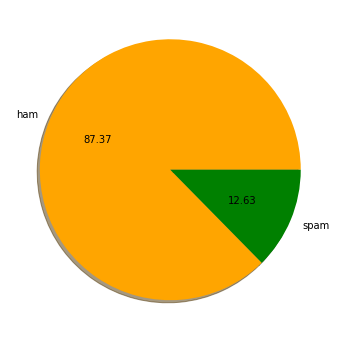

In [45]:
plt.figure(figsize=(14,6))
plt.pie(spam_df["target"].value_counts(), labels = ["ham","spam"],autopct="%.2f",shadow=True,colors = ["orange","g"])
plt.show()

**From the pie chart we can clearly see that, % of ham is 87.37 , whereas, % of spam is 12.63, hence, we can conclude that the data distribution is uneven or we can say that the data is Imbalanced**

## Feature Extraction
### Analysis of `alphabets, words, sentences` that are used in the `text` column
**For deeper analysis we'll create three separate columns & we'll achieve it via*** `nltk` **nlp library:**
1. **Number of characters in the Text**
2. **Number of words in the Text**
3. **Number of sentences in the Text**

In [46]:
import nltk

**Downloading some nltk dependencies**

In [47]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/subratamondal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [54]:
# Character count
spam_df["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [55]:
# Creating Character count column
spam_df["character_count"] = spam_df["text"].apply(len)

In [60]:
spam_df.sample(5)

,target,text,character_count
3702,0,How is my boy? No sweet words left for me this...,127
3752,0,Ya that one is slow as poo,26
3637,1,Customer service announcement. We recently tri...,152
2929,0,Wat's my dear doing? Sleeping ah?,33
4950,0,hi baby im sat on the bloody bus at the mo and...,136


**Breaking the text into words**

In [61]:
# Extracting words with nltk.word_tokenize
spam_df["text"].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [63]:
# Word count
spam_df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [64]:
# Creating Word count column
spam_df["word_count"] = spam_df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

In [65]:
spam_df.sample(5)

,target,text,character_count,word_count
62,0,Its a part of checking IQ,25,6
4841,0,"Awesome, that gonna be soon or later tonight?",45,11
1879,1,U have a secret admirer who is looking 2 make ...,132,26
333,0,Any chance you might have had with me evaporat...,232,47
355,0,Thank You for calling.Forgot to say Happy Onam...,202,38


**Breaking the text into sentences**

In [66]:
# Extracting sentences with nltk.word_tokenize
spam_df["text"].apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [67]:
spam_df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [68]:
spam_df["sentence_count"] = spam_df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [69]:
spam_df.sample(5)

,target,text,character_count,word_count,sentence_count
127,0,Are you there in room.,22,6,1
4093,0,how are you? I miss you!,24,8,2
671,1,SMS. ac sun0819 posts HELLO:\You seem cool,42,10,2
4266,0,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...,75,17,1
3825,0,"Goodmorning,my grandfather expired..so am on l...",57,12,1


In [71]:
spam_df[["character_count","word_count","sentence_count"]].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


**Applying descriptive analysis on colums that are Not Spam i.e Ham i.e 0**

In [74]:
# Ham or Not Spam
spam_df[spam_df["target"]==0][["character_count","word_count","sentence_count"]].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


**Applying descriptive analysis on colums that are Spam i.e 0**

In [73]:
# Spam
spam_df[spam_df["target"]== 1][["character_count","word_count","sentence_count"]].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### Character count in Spam Text vs Non Spam Text

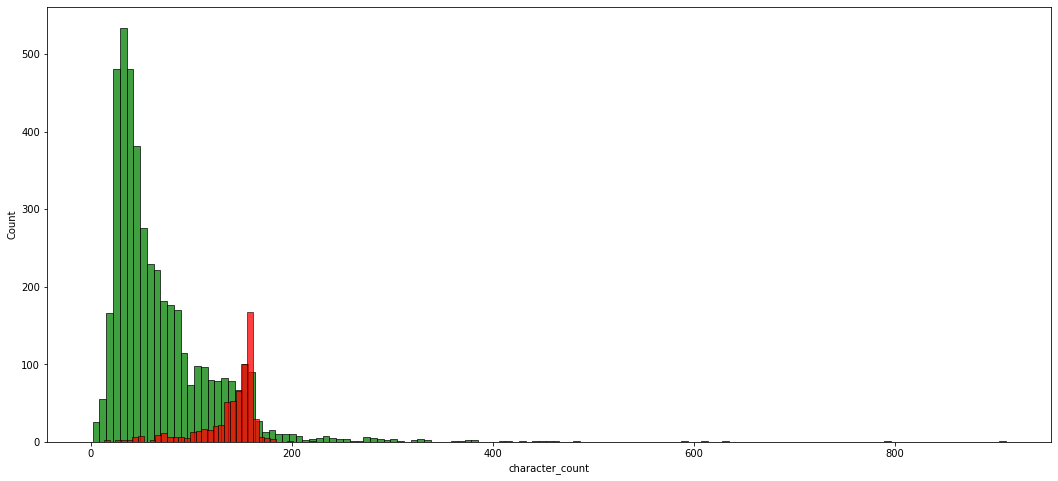

In [89]:
plt.figure(figsize=(18,8))
sns.histplot(spam_df[spam_df["target"]==0]["character_count"],color="g")
sns.histplot(spam_df[spam_df["target"]==1]["character_count"],color="r")
plt.show()

### Word count in Spam Text vs Non Spam Text

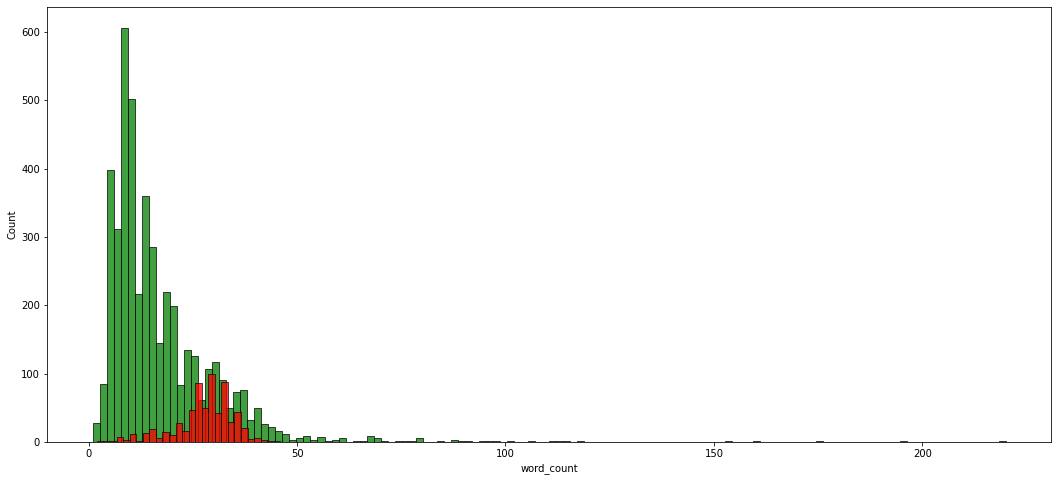

In [93]:
plt.figure(figsize=(18,8))
sns.histplot(spam_df[spam_df["target"]==0]["word_count"],color="g")
sns.histplot(spam_df[spam_df["target"]==1]["word_count"],color="r")
plt.show()

### Sentence count in Spam Text vs Non Spam Text

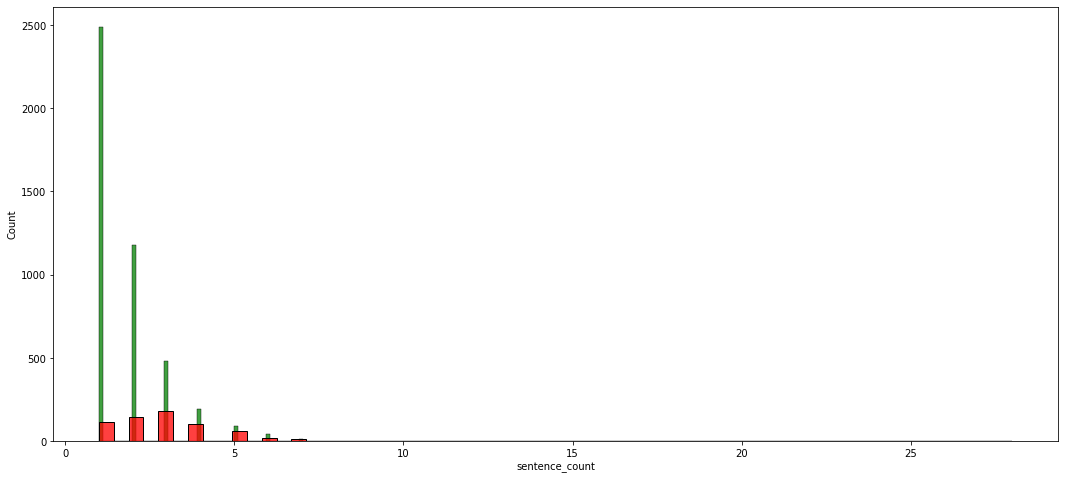

In [91]:
plt.figure(figsize=(18,8))
sns.histplot(spam_df[spam_df["target"]==0]["sentence_count"],color="g")
sns.histplot(spam_df[spam_df["target"]==1]["sentence_count"],color="r")
plt.show()

## Pairplot
**To check the relation of the columns with each other**

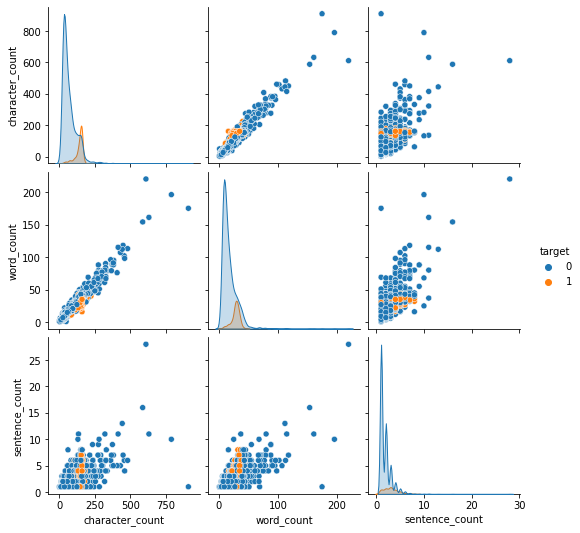

In [103]:
sns.pairplot(spam_df,hue="target")
plt.show()

**From the above plot, we can analyze that there are outliers present in the data.**
## Heatmap
**To check the correlation among the columns**

<AxesSubplot:>

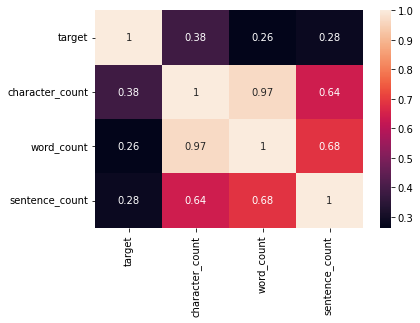

In [107]:
sns.heatmap(spam_df.corr(),annot=True)

**From the above Heatmap we analysed that character_count column has the highest correlation of 0.38 with the target column, and since there is multi-colinearity among the columns, therefore, we'll keep only the character_count column for further analysis**

# 4. Text Data Preprocessing
Steps involved are :
* **Lower Case :** `Convert the text into lower case`
* **Tokenization :** `Breaks the text into tokens or words`
* **Removing Special Characters :** `Removal of special characters`
* **Removing stop words and punctuation** `Remove stop words like 'and, if, is, are, etc' that are used for sentence formation but do not contributes to the meaning of the sentence`
* **Stemming** `Converts multiple form of one word to a single form like : from ['love','loved','loving'] to ['love','love','love']`

### Helper Function 
**To perform all the Text Data Preprocessing steps in one go**

In [112]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subratamondal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [116]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [117]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [124]:
from nltk.stem import PorterStemmer
porterStemmer = PorterStemmer()

In [129]:
def text_preprocessing(text):
    text = text.lower() # return lowercase str | Lower Case
    text = nltk.word_tokenize(text) # returns list of tokenize words | Tokenization
    store = [] 
    
    for i in text: 
        if i.isalnum(): # Removing Special Characters
            store.append(i) # Storing only alphanumeric characters | Removing Special Characters
            
    text = store[:]
    store.clear()
    
    for i in text: 
        if i not in stopwords.words("english") and i not in string.punctuation: # Removing stop words and punctuation
            store.append(i)
            
    text = store[:]
    store.clear()
    
    for i in text:
        store.append(porterStemmer.stem(i)) # Stemming
    
    text = store
    
    return " ".join(text)

    

In [130]:
# Demo
text_preprocessing("Hey man ! it was great seeing you. The greatest moment ever")

'hey man great see greatest moment ever'

### Apllying textPreprocessing on the `text` column

In [131]:
spam_df["text"].apply(text_preprocessing)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [132]:
spam_df["transformed_text"] = spam_df["text"].apply(text_preprocessing)

In [133]:
spam_df.sample(5)

,target,text,character_count,word_count,sentence_count,transformed_text
1845,0,Hi. || Do u want | to join me with sts later? ...,93,26,4,hi u want join st later meet five call u class
1030,0,Can not use foreign stamps in this country. Go...,58,12,2,use foreign stamp countri good lectur
873,0,Ugh its been a long day. I'm exhausted. Just w...,77,20,3,ugh long day exhaust want cuddl take nap
5436,0,Mode men or have you left.,26,7,1,mode men left
2366,1,Tone Club: Your subs has now expired 2 re-sub ...,158,33,1,tone club sub expir 2 repli monoc 4 mono polyc...


## Wordcloud
**Most frequent words used in a text.**

In [144]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = "white")

**Wordcloud of Spam text, larger the text most frequently the word was used in the text**

In [148]:
spam_wordcloud = wc.generate(spam_df[spam_df["target"] == 1]["transformed_text"].str.cat(sep=""))

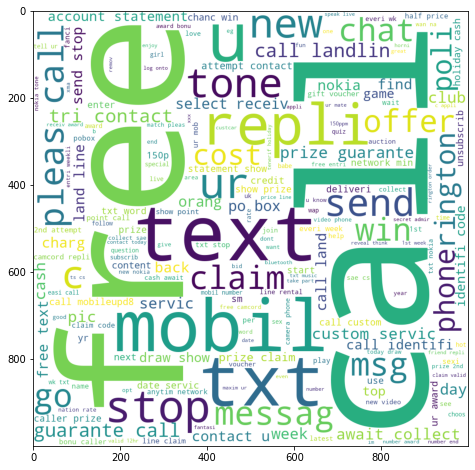

In [150]:
plt.figure(figsize=(18,8))
plt.imshow(spam_wordcloud)
plt.show()

From the above spam word cloud we can see that the words : **call, text, free, mobil, stop, send, etc are used at most in spam texts**

**Wordcloud of Not Spam text, larger the text most frequently the word was used in the text**

In [153]:
not_spam_wordcloud = wc.generate(spam_df[spam_df["target"] == 0]["transformed_text"].str.cat(sep=""))

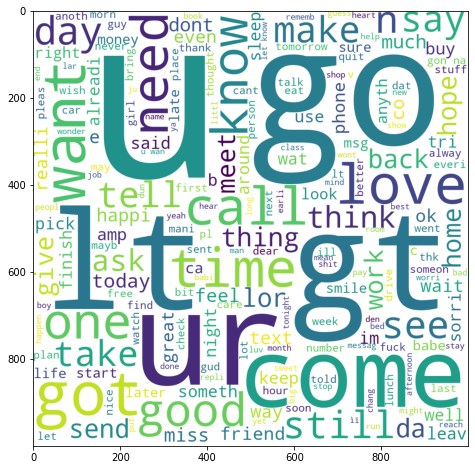

In [154]:
plt.figure(figsize=(18,8))
plt.imshow(not_spam_wordcloud)
plt.show()

From the above spam word cloud we can see that the words : **u go, time, come, good, got, thing, etc are used at most in non spam texts**

**Lets see top 30 frequent words used in Spam Text and Not Spam Text**

# 5. Modelling

# 6. Model Evaluation

# 7. Model Improvements

# 8. Website Creation

# 9. Deployment